# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [4]:
# Import the data
path = "Resources/lending_data.csv"
df = pd.read_csv(path)
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [5]:
df.head

<bound method NDFrame.head of        loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672            52800        0.431818   
1         8400.0          6.692            43600        0.311927   
2         9000.0          6.963            46100        0.349241   
3        10700.0          7.664            52700        0.430740   
4        10800.0          7.698            53000        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10.595            80300        0.626401   
77534    16300.0         10.068            75300        0.601594   
77535    15600.0          9.742            72300        0.585062   

       num_of_accounts  derogatory_marks  total_debt  loan_status  
0                    5                 1       22800            0  
1                

In [10]:
df["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

C:\Users\Samanthi Nisanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


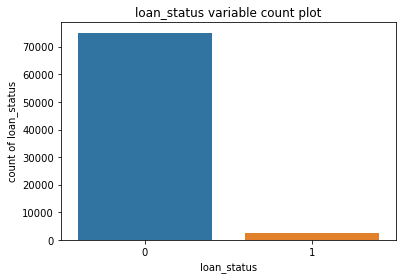

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df["loan_status"])
plt.xlabel("loan_status")
plt.ylabel("count of loan_status")
plt.title("loan_status variable count plot")
plt.show()


### Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

Prediction:

"Random Forest Classifier" has 8 variables in this set of data. So it may perform better here than "LogisticRegression

## Split the Data into Training and Testing Sets

In [7]:
# Split the data into X_train, X_test, y_train, y_test
y = df["loan_status"].values
X = df.drop("loan_status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [8]:
# Train a Logistic Regression model and print the model score

# Train a Logistic Regression model print the model score

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=77535)
classifier.fit(X_train_scaled, y_train)



print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9941188609162196
Testing Data Score: 0.9694593479158069


C:\Users\Samanthi Nisanka\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
# Train a Random Forest Classifier model and print the model score

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)




print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

The Random Forest Classifier model wins with a higher scores for both the Training Score and Testing Score.